# ODEs: the characteristic polynomial

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*The basics of all things control*

*Systems are all and all is a system.* So you can decribe dynamic processses with physics, then you get equations with time derivatives. So for Linear-Time-Independent (LTI) systems, the differential equation with output $y(t)$ and input $u(t)$ is
$$ \frac{d^n}{d^nt}y + a_1\frac{d^{n-1}}{d^{n-1}t}y + \cdots + a_n y = \frac{d^m}{d^mt}u + b_1\frac{d^{m-1}}{d^{m-1}t}u + \cdots + b_m u.$$
Here, $n$ is called the order of the system.

We want to be able to solve Initial Value Problems (IVPs), because that's cool and it shows us what the system will do from some initial state. This solution is built in two steps, the homogenous solution and satisfying the initial conditions.

The homogenous solution is obtained by equation the left hand side to zero. For this, we'll steal a little ahead from the Laplace transform where
$$ \frac{d^n}{d^nt} \overset{\mathcal{F}}{\rightarrow} s^n. $$
Applying this and eliminating $y$ to obtain the homogenous solution yields
$$\frac{d^n}{d^nt}y + a_1\frac{d^{n-1}}{d^{n-1}t}y + \cdots + a_n y = 0 $$
$$\overset{\mathcal{F},\; \frac{1}{y}}{\rightarrow} s^n + a_1 s^{n-1} + \cdots + a_n = 0. $$
This is a polynomial of order $n$ called **the characteristic polynomial** and we know then it has $n$ roots as well.

These roots, $\lambda_k$, actually form the solution to the homogenous problem, since a polynomial is the product of its roots,
$$ \prod_{k=1}^n (s-\lambda_k).$$
The solution to these types of ODEs are sums of exponentials of the form $c_k e^{\lambda_k t}$, where $c_k$ is determined through the initial condition. Therefore, the complete solution is
$$ y(t) = \sum_{k= 1}^n c_k e^{\lambda_k t} .$$

## Stability
If all $\mathfrak{Re}(\lambda_k) < 0$ then $y(t)$ goes to 0 and the system is stable. The Routh-Hurwitz criterion gives the stability requirements up to the third degree. Stability is guaranteed for systems of order
1. if $a_1 > 0$.
2. if $a_1, a_2 > 0$.
3. if $a_1, a_2, a_3 >0$ and $ a_1a_2 > a_3$.

## Trajectory examples
Real-valued $\lambda_k$ yield an exponential trajectory $e^{\lambda_k t}$. Complex-values come in conjugate pairs so they yield an exponential trajectory multiplied by a cosine. Because $\lambda_k, \lambda_{k+1} = \epsilon \pm j\omega$, the trajectory of this pair becomes $e^{(\epsilon \pm j\omega)t} = e^{\epsilon t} (e^{j\omega t} + e^{-j\omega t}) = e^{\epsilon t} (2\cos(\omega t))$. Play around with the code block here to get a feel for it!

<IPython.core.display.Javascript object>

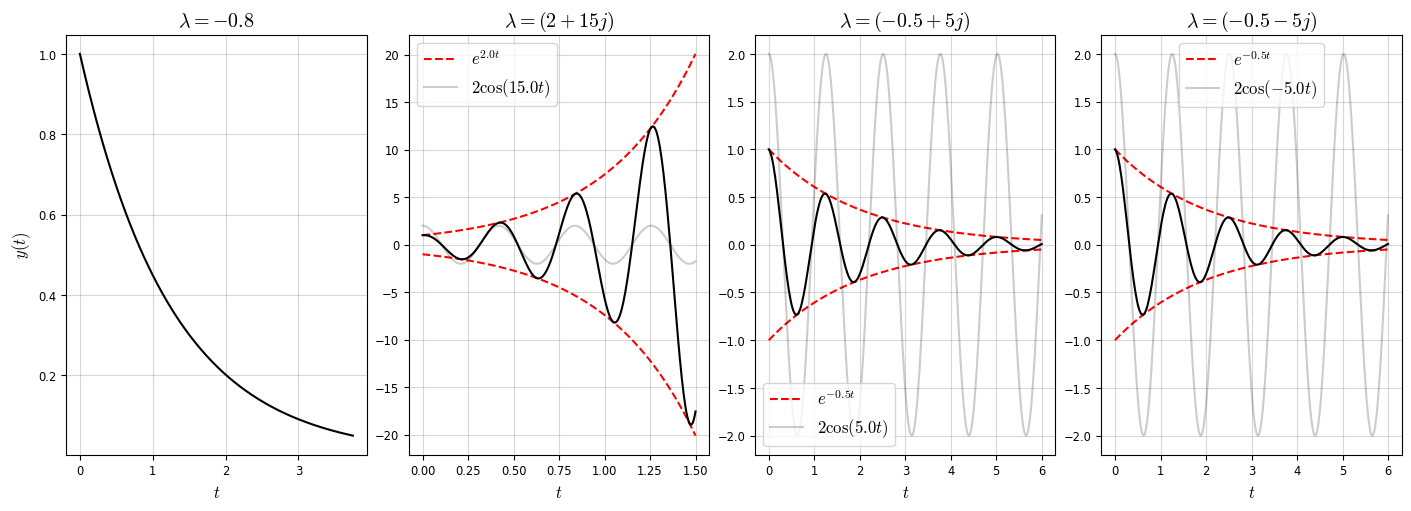

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
from helperFunctions import *
setPlotStyle()

## Eigenvalues
SIG =  [ -0.8,
         2 + 15j,
         -0.5 + 5j,
         -0.5 - 5j,
        ] # Add or remove any you'd like to see

###### Plotting #########
fig, ax = plt.subplots(1,len(SIG), figsize=[14,5])
for sig, idx in zip(SIG, range(len(SIG))):
    t = np.linspace(0, 3/abs(sig.real) if sig.real != 0 else 1, 300) # Adapt to convergence speed
    if np.iscomplex(sig): # Plot decomposition
        l1, = ax[idx].plot(t, np.exp(sig.real * t), 'r--', label=f"$e^{r"{"}{sig.real}t{r"}"}$") # Upper envelope
        ax[idx].plot(t, -np.exp(sig.real * t), 'r--') # Lower envelope
        l2, = ax[idx].plot(t, 2*np.cos(sig.imag * t), 'k', alpha=0.2, label=rf"$2\cos({sig.imag} t)$") # Oscillation
        ax[idx].legend(handles=[l1, l2])
    ax[idx].plot(t, np.exp(sig * t), 'k') # Trajectory
    ax[idx].set(title=rf"$\lambda = {sig}$", xlabel="$t$")

ax[0].set_ylabel("$y(t)$")
display(fig)

